# I] Import functions and options

In [53]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [54]:
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 
                            'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8)})

In [55]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [ ]:
path = output_file_directory + "ATG7/TCGA_GTEX/all_tissues/"

# II] Data download

In [ ]:
path2 = 'dataframes_for_input/'

In [56]:
%%time
# DL data ATG7 isoform expression
df_ATG7_Normal = pandas.read_csv(path+path2+'df_ATG7_Normal_all.csv', sep = ",")
df_ATG7_Primary = pandas.read_csv(path+path2+'df_ATG7_Primary_all.csv', sep = ",")

#remove Survival information
dfs = df_ATG7_Normal, df_ATG7_Primary
for df in dfs:
    df.drop(df.columns[[3, 4]], axis = 1, inplace = True)

print(df_ATG7_Normal.shape)
df_ATG7_Normal.head(2)

(7401, 20)
Wall time: 82.8 ms


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-ZTTD-0326-SM-57WFW,Normal Tissue,Muscle,5.042,3.860,2.390,0.2642,32.944283,14.519306,5.240574,1.199970,5.085097,3.955992,2.641679,20.95985,69.271996,25.002916,5.725088,0.440723,0.159074
1,GTEX-PX3G-1626-SM-2S1PT,Normal Tissue,Muscle,4.252,2.322,1.956,1.1320,19.052710,4.999249,3.878848,2.190624,4.325725,2.584782,2.286540,11.06872,45.165557,35.043325,19.791118,0.262390,0.203585


In [71]:
#create df with the two groups
df_ATG7_NormPrim = pandas.concat([df_ATG7_Normal, df_ATG7_Primary], axis=0)
print(df_ATG7_NormPrim.shape)
df_ATG7_NormPrim.head(2)

(16179, 20)


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-ZTTD-0326-SM-57WFW,Normal Tissue,Muscle,5.042,3.860,2.390,0.2642,32.944283,14.519306,5.240574,1.199970,5.085097,3.955992,2.641679,20.95985,69.271996,25.002916,5.725088,0.440723,0.159074
1,GTEX-PX3G-1626-SM-2S1PT,Normal Tissue,Muscle,4.252,2.322,1.956,1.1320,19.052710,4.999249,3.878848,2.190624,4.325725,2.584782,2.286540,11.06872,45.165557,35.043325,19.791118,0.262390,0.203585


# III] ATG7 expression

In [ ]:
path2 = 'figs_ATG7_characterisation/'

## A) ATG7 expression

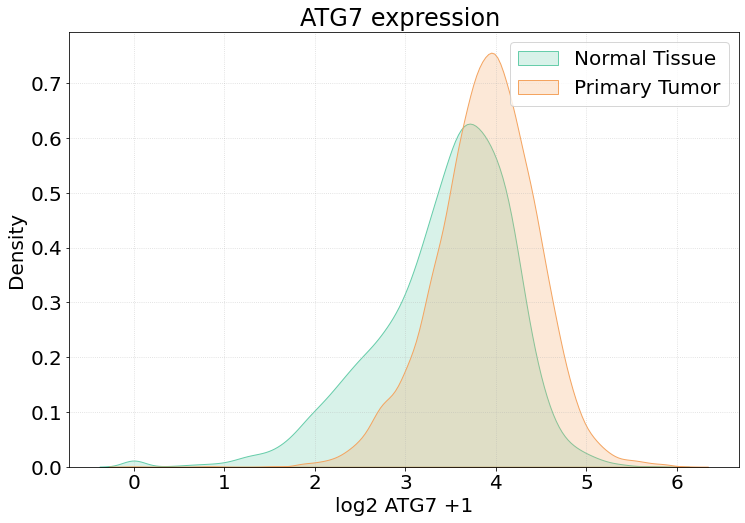

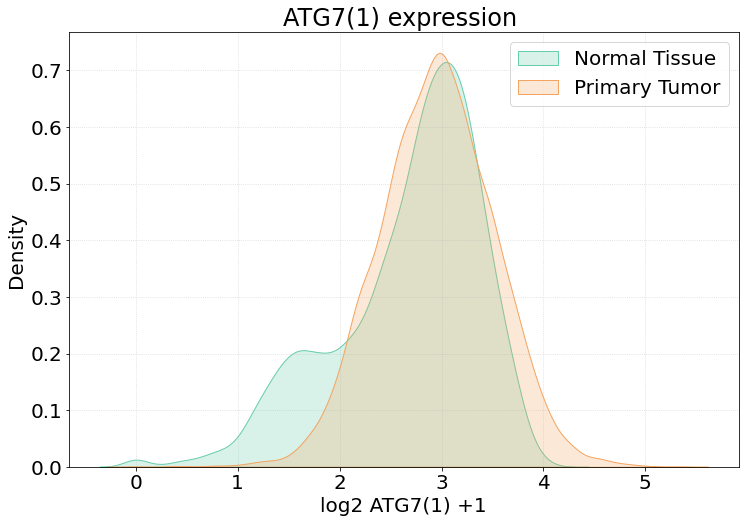

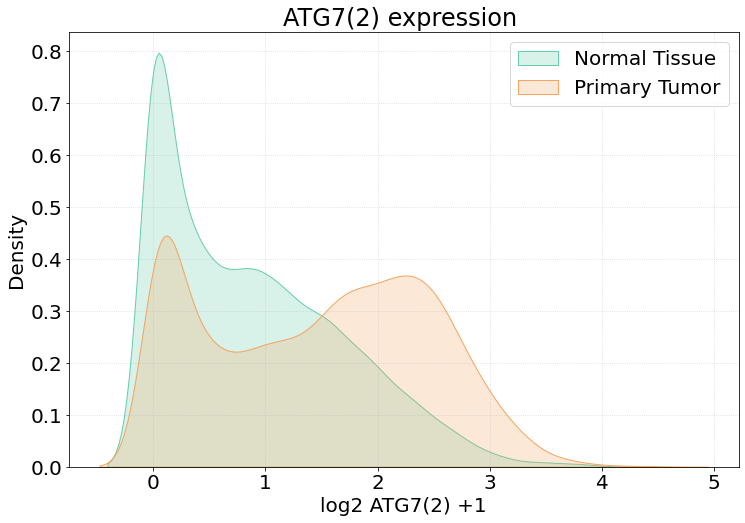

<Figure size 864x576 with 0 Axes>

In [58]:
# Distribution graph, for ATG7, iso1 & iso2
isoforms = 'log2_p1_ATG7_total', 'log2_p1_ATG7_1', 'log2_p1_ATG7_2'
isoforms_info = 'ATG7', 'ATG7(1)', 'ATG7(2)'

for i in range(len(isoforms)):
    isoform = isoforms[i]
    xData = df_ATG7_Normal[isoform]
    x2Data = df_ATG7_Primary[isoform]

    seaborn.kdeplot(xData, color = 'mediumaquamarine', fill = True)
    seaborn.kdeplot(x2Data, color = 'sandybrown', fill = True)

    plt.xlabel('log2 '+ isoforms_info[i] + ' +1')
    plt.title(isoforms_info[i]+ ' expression ')
    plt.legend(labels=["Normal Tissue","Primary Tumor"])
    title_file = 'distrib_' + isoforms_info[i]
    
    plt.savefig(path+path2+title_file+'.svg')
    plt.show()
    plt.clf()

## B) Percentage do not express ATG7 isoforms

In [109]:
dfs = df_ATG7_Normal, df_ATG7_Primary
infos = 'all normal tissue', 'all primary tumor'
isoforms = 'ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm', 'ATG7_3tpm'
iso_names = 'ATG7', 'ATG7(1)', 'ATG7(2)', 'ATG7(3)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    print(info.upper())
    
    for j in range(len(isoforms)):
        isoform = isoforms[j]
        iso_name = iso_names[j]

        all_ = (df[isoform]).shape
        no_exp = (df[isoform]<0.1).sum()
        perc_no_exp = (no_exp*100)/all_
        perc_no_exp = float(perc_no_exp)
        print(round(perc_no_exp,1),'% of tumor do not express', iso_name)

    print()

ALL NORMAL TISSUE
0.4 % of tumor do not express ATG7
0.4 % of tumor do not express ATG7(1)
24.3 % of tumor do not express ATG7(2)
59.2 % of tumor do not express ATG7(3)

ALL PRIMARY TUMOR
0.0 % of tumor do not express ATG7
0.0 % of tumor do not express ATG7(1)
13.3 % of tumor do not express ATG7(2)
33.3 % of tumor do not express ATG7(3)



In [67]:
dfs = df_ATG7_Normal, df_ATG7_Primary
infos = 'all normal tissue', 'all primary tumor'
isoforms = 'ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm', 'ATG7_3tpm'
iso_names = 'ATG7', 'ATG7(1)', 'ATG7(2)', 'ATG7(3)'

df_number_exp = []
what = []
sample_type = []
who_dontexp = []
perc_noexp = []

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
      
    print(info.upper())
    
    for j in range(len(isoforms)):
        isoform = isoforms[j]
        iso_name = iso_names[j]

        #save what isoform
        what.append(isoform)
        #save sample_type
        sample_type.append(info)
        #have total sample number
        all_ = (df[isoform]).shape
        #calculate number of sample who express the isoform
        without_exp = (df[isoform]<0.1).sum()
        who_dontexp.append(without_exp)
        #convert result to percentage
        perc_without_exp = float((without_exp*100)/all_)   
        perc_noexp.append(round(perc_without_exp,1))

#create a dictionnary and convert to dataframe
d = dict(Isoforms = what, who_dontexp = who_dontexp, 
         Percentage = perc_noexp, Sample_Type = sample_type)
df_noexpr_distrib = pandas.DataFrame.from_dict(d, orient='index')
df_noexpr_distrib = df_noexpr_distrib.T
          
df_noexpr_distrib

ALL NORMAL TISSUE
ALL PRIMARY TUMOR


,Isoforms,who_dontexp,Percentage,Sample_Type
0,ATG7_total,27,0.4,all normal tissue
1,ATG7_1tpm,27,0.4,all normal tissue
2,ATG7_2tpm,1801,24.3,all normal tissue
3,ATG7_3tpm,4380,59.2,all normal tissue
4,ATG7_total,1,0,all primary tumor
5,ATG7_1tpm,1,0,all primary tumor
6,ATG7_2tpm,1167,13.3,all primary tumor
7,ATG7_3tpm,2922,33.3,all primary tumor


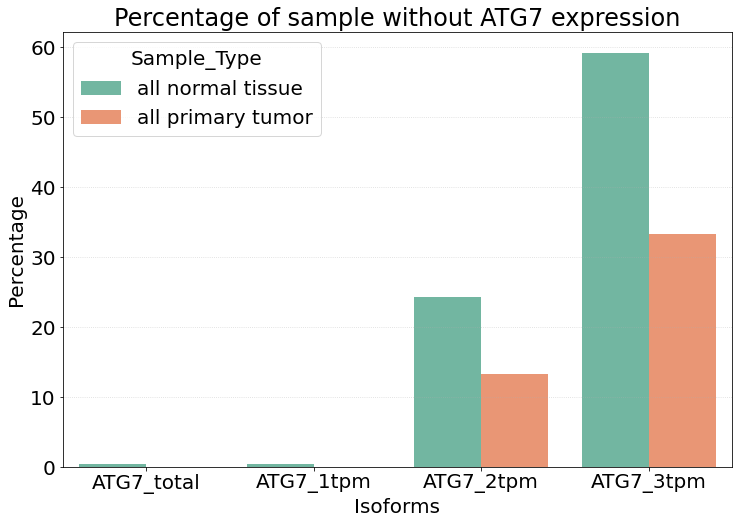

In [110]:
seaborn.barplot(data=df_noexpr_distrib, x="Isoforms", y="Percentage", hue="Sample_Type", 
                palette = 'Set2', orient = 'v')
plt.title("Percentage of sample without ATG7 expression")
plt.yticks(fontsize=20)

plt.savefig(path+path2+'percentage_expression.svg')

## C) Expression figures

### 1) Value TPM

(16179, 4)
shape after df transformation: (48537, 3)

      Sample_Type    isoforms      value
0  Normal Tissue  ATG7_total  32.944283
1  Normal Tissue  ATG7_total  19.052710
2  Normal Tissue  ATG7_total  15.020948
3  Normal Tissue  ATG7_total  14.459044
4  Normal Tissue  ATG7_total  14.141840


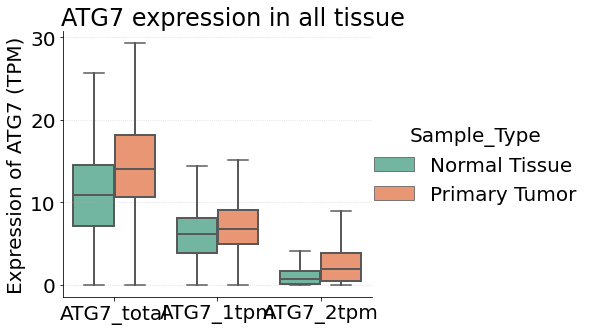

In [114]:
# Distribution: Data preparation + graph
data = df_ATG7_NormPrim[['Sample_Type','ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm']]
info = 'all tissue'

print(data.shape)

#transform the DF to only have values in an unique column
data = data.melt(id_vars=["Sample_Type"], var_name="isoforms")
print(f'shape after df transformation: {data.shape}')
print('\n', data.head())

seaborn.catplot(data = data, x="isoforms", y="value", hue="Sample_Type", aspect= 1.2, kind="box", palette = 'Set2',
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('Expression of ATG7 (TPM)')
plt.xlabel('')
plt.title('ATG7 expression in '+ info, x=.55)

#save
plt.savefig(path+path2+'ATG7_exp_alltissue.svg')

In [117]:
data

,Sample_Type,isoforms,value
0,Normal Tissue,ATG7_total,32.944283
1,Normal Tissue,ATG7_total,19.052710
2,Normal Tissue,ATG7_total,15.020948
3,Normal Tissue,ATG7_total,14.459044
4,Normal Tissue,ATG7_total,14.141840
...,...,...,...
48532,Primary Tumor,ATG7_2tpm,0.000000
48533,Primary Tumor,ATG7_2tpm,0.409940
48534,Primary Tumor,ATG7_2tpm,0.420031
48535,Primary Tumor,ATG7_2tpm,0.000000


In [118]:
#Verification everything is correct
#median from brut file:
print('brut file:')
isoforms = 'ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm'
for isoform in isoforms:
    print(df_ATG7_NormPrim[isoform].median())

#median after modification:
isoforms = 'ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm'
print('------------\nafter modification:')                     
for isoform in isoforms:
    print(data[data['isoforms'] == isoform].median())

brut file:
12.587199125657055
6.4880172446163416
1.140000955679887
------------
after modification:
value    12.587199
dtype: float64
value    6.488017
dtype: float64
value    1.140001
dtype: float64


In [107]:
#Distribution: Stats for all 
isoforms = 'ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm'
iso_names = 'ATG7', 'ATG7(1)', 'ATG7(2)'

for i in range(len(isoforms)):
    isoform = isoforms[i]
    iso_name = iso_names[i]

    n1 = "{:.3f}".format(df_ATG7_Normal[isoform].median())
    n2 = "{:.3f}".format(df_ATG7_Primary[isoform].median())

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ATG7_Normal[isoform], df_ATG7_Primary[isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue between normal tissue ({n1}) and primary tumor ({n2}) for {iso_name} is {Pvalue}')
print()

pvalue between normal tissue (10.829) and primary tumor (14.020) for ATG7 is 0.000E+00
pvalue between normal tissue (6.129) and primary tumor (6.764) for ATG7(1) is 7.991E-91
pvalue between normal tissue (0.660) and primary tumor (1.940) for ATG7(2) is 0.000E+00



### 2) Normalized

(16179, 3)
shape after df transformation: (32358, 3)

      Sample_Type    isoforms     value
0  Normal Tissue  ATG7_1norm  0.440723
1  Normal Tissue  ATG7_1norm  0.262390
2  Normal Tissue  ATG7_1norm  0.404121
3  Normal Tissue  ATG7_1norm  0.410046
4  Normal Tissue  ATG7_1norm  0.316830


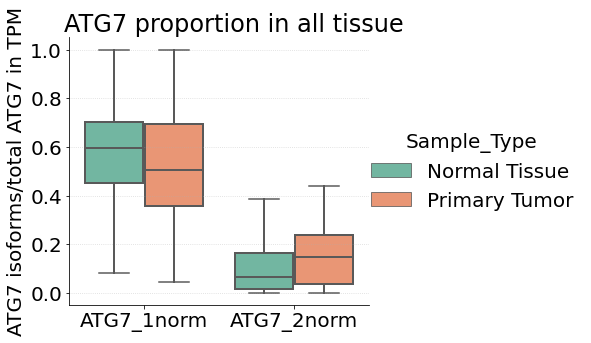

In [120]:
# Distribution: Data preparation + graph
data = df_ATG7_NormPrim[['Sample_Type','ATG7_1norm', 'ATG7_2norm']]
info = 'all tissue'

print(data.shape)

#transform the DF to only have values in an unique column
data = data.melt(id_vars=["Sample_Type"], var_name="isoforms")
print(f'shape after df transformation: {data.shape}')
print('\n', data.head())

seaborn.catplot(data = data, x="isoforms", y="value", hue="Sample_Type", aspect= 1.2, kind="box", palette = 'Set2',
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('ATG7 isoforms/total ATG7 in TPM')
plt.xlabel('')
plt.title('ATG7 proportion in '+ info, x=0.55)

#save graph
plt.savefig(path+path2+'prop_alltissue.svg')

In [121]:
#Verification everything is correct
#median from brut file:
print('brut file:')
isoforms = 'ATG7_1norm', 'ATG7_2norm'
for isoform in isoforms:
    print(df_ATG7_NormPrim[isoform].median())

#median after modification:
isoforms = 'ATG7_1norm', 'ATG7_2norm'
print('------------\nafter modification:')                     
for isoform in isoforms:
    print(data[data['isoforms'] == isoform].median())

brut file:
0.5528165633910423
0.1063770854801066
------------
after modification:
value    0.552817
dtype: float64
value    0.106377
dtype: float64


In [122]:
#Distribution: Stats for all 
isoforms = 'ATG7_1norm', 'ATG7_2norm'
iso_names = 'ATG7(1)/total ATG7', 'ATG7(2)/total ATG7'

for i in range(len(isoforms)):
    isoform = isoforms[i]
    iso_name = iso_names[i]

    n1 = "{:.3f}".format(df_ATG7_Normal[isoform].median())
    n2 = "{:.3f}".format(df_ATG7_Primary[isoform].median())

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ATG7_Normal[isoform], df_ATG7_Primary[isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue between normal tissue ({n1}) and primary tumor ({n2}) for {iso_name} is {Pvalue}')
print()

pvalue between normal tissue (0.594) and primary tumor (0.503) for ATG7(1)/total ATG7 is 1.249E-58
pvalue between normal tissue (0.067) and primary tumor (0.147) for ATG7(2)/total ATG7 is 3.446E-189



## D) Correlation between the two isoforms

In [123]:
#Remove the 0.5% extremities to have a nicer graph
dfs = df_ATG7_Normal, df_ATG7_Primary
infos = "Normal tissue", "Primary tumor"
isoforms = 'ATG7_1', 'ATG7_2'
df_final = []

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    isoform = isoforms[i]

    #Remove 0.5% extremities
    df_no_extrem = []
    for isoform in isoforms:
        print(info, ':', df.shape)
        #sort by value, 
        for_isoforms = df.sort_values([isoform], ascending = False)
        print(isoform)
        
        #remove the extremities
        lenght = len(for_isoforms)
        without_05perc = int(lenght*0.005)
        print('', without_05perc, 'are removed from head and tail')
        without_head = without_05perc
        without_tail = lenght - without_05perc
                
        df_no_extremities = for_isoforms.iloc[without_head:without_tail,:]
        print(' without extremities:', df_no_extremities.shape)
        print()
        df_no_extrem.append(df_no_extremities)
        
    #drop the unfiltered column ATG7_2 ([0]) and replace it with the filtered one ([1]) 
    df_no_extrem[0].pop("ATG7_2")
    #add column ATG7_2 (filtered one) at the correct position
    df_no_extrem[0].insert(5, "ATG7_2", df_no_extrem[1]['ATG7_2'])
    #remove NaN (the deleted samples for the two isoform)
    df = df_no_extrem[0].dropna(axis=0)
    df_final.append(df)
    print('df_final after merge of the two filtered columns:', df.shape)
    print('________________________')
    #now, need to compute the two isoform with sample name.

Normal tissue : (7401, 20)
ATG7_1
 37 are removed from head and tail
 without extremities: (7327, 20)

Normal tissue : (7401, 20)
ATG7_2
 37 are removed from head and tail
 without extremities: (7327, 20)

df_final after merge of the two filtered columns: (7253, 20)
________________________
Primary tumor : (8778, 20)
ATG7_1
 43 are removed from head and tail
 without extremities: (8692, 20)

Primary tumor : (8778, 20)
ATG7_2
 43 are removed from head and tail
 without extremities: (8692, 20)

df_final after merge of the two filtered columns: (8607, 20)
________________________


The correlation between iso1 and iso2 in Normal tissue is: 0.017579274049677827, 0.13439624254608087


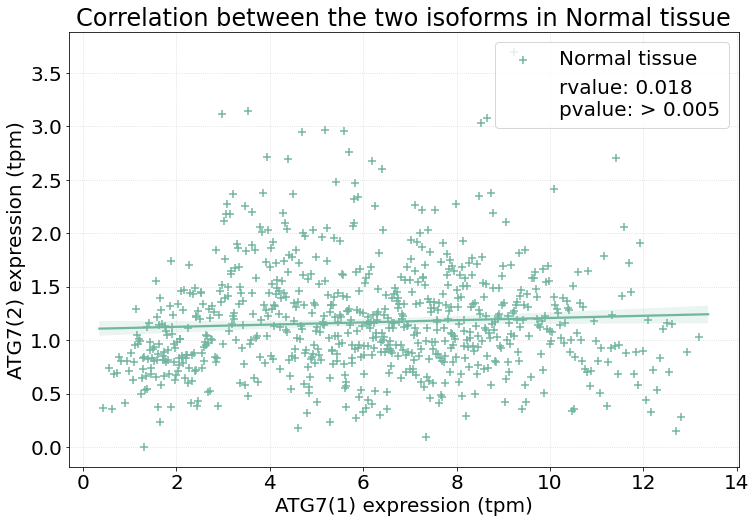


The correlation between iso1 and iso2 in Primary tumor is: -0.21495502796326948, 1.603924285044966e-90


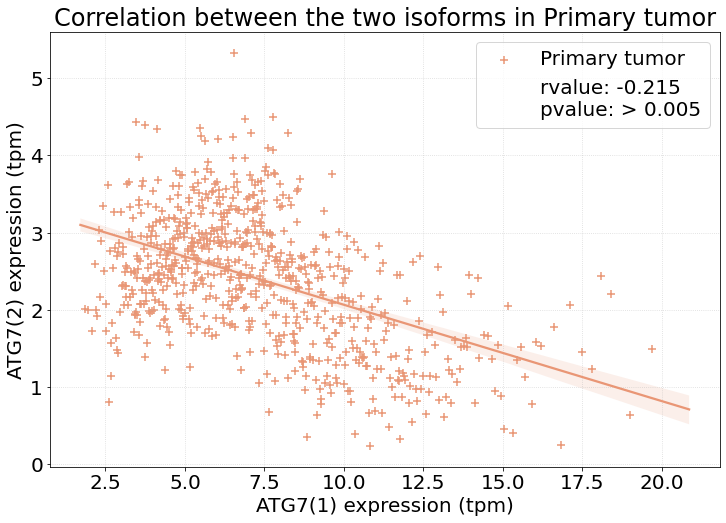

<Figure size 864x576 with 0 Axes>

In [22]:
#Graph and stats_ spearman correlation
dfs = df_final[0], df_final[1]
infos = "Normal tissue", "Primary tumor"
pvalue_texts = '> 0.005', '> 0.005'
colors_ = '#72B6A1', '#e99675'

for i in range(len(dfs)): 
    df = dfs[i]
    info = infos[i]
    pvalue_text = pvalue_texts[i]
    color_ = colors_[i]
    
    x = df['ATG7_1tpm'].to_list()
    y = df['ATG7_2tpm'].to_list()    
    
    #stat Spearman correlation 
    r_value, p_value = scipy.stats.spearmanr(x, y)
    print(f'The correlation between iso1 and iso2 in {info} is: {r_value}, {p_value}')
    
    #graph
    seaborn.regplot(x=x,y=y, x_bins=800, x_ci = 0, marker="+", label = info, color = color_)
    seaborn.regplot(x=[],y=[], marker=" ", 
                    label= f'rvalue: {str(round(r_value,3))} \npvalue: {str(pvalue_text)}')

    plt.title(f'Correlation between the two isoforms in {info}')
    plt.xlabel("ATG7(1) expression (tpm)")
    plt.ylabel('ATG7(2) expression (tpm)')

    plt.grid(ls = ":", alpha=0.5)
    plt.legend()

    #save
    title_file = 'ATG7s_corr_tpm_' + info
    plt.savefig(path+path2+title_file+'.svg')

    plt.show()  
    plt.clf()
    print()

## a. Only normal for article

In [38]:
df.shape

(7253, 20)

The correlation between iso1 and iso2 in Normal tissue is: 0.017579274049677827, 0.13439624254608087


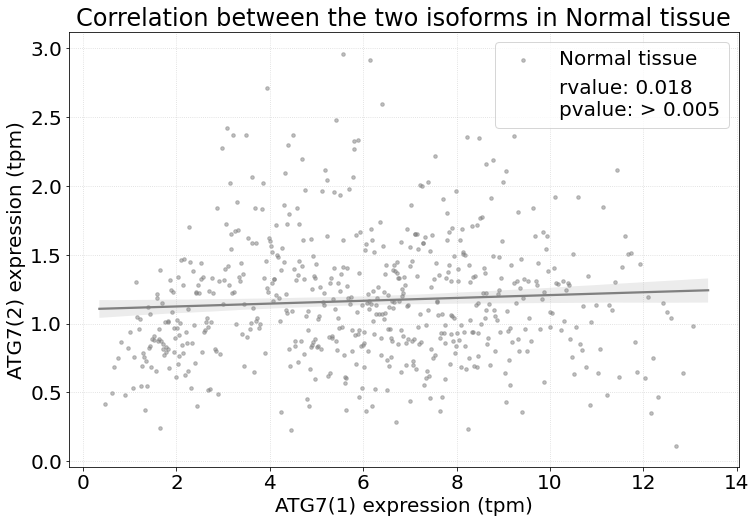

<Figure size 864x576 with 0 Axes>

In [41]:
#Graph and stats_ spearman correlation
df = df_final[0]
info = "Normal tissue"
pvalue_text = '> 0.005'

x = df['ATG7_1tpm'].to_list()
y = df['ATG7_2tpm'].to_list()    

#stat Spearman correlation 
r_value, p_value = scipy.stats.spearmanr(x, y)
print(f'The correlation between iso1 and iso2 in {info} is: {r_value}, {p_value}')

#graph
seaborn.regplot(x=x,y=y, x_bins=600, x_ci = 0, marker=".", label = info, 
                scatter_kws={"color": "grey", "alpha": 0.5}, line_kws={"color": "grey"})

seaborn.regplot(x=[],y=[], marker=" ", 
                label= f'rvalue: {str(round(r_value,3))} \npvalue: {str(pvalue_text)}')

plt.title(f'Correlation between the two isoforms in {info}')
plt.xlabel("ATG7(1) expression (tpm)")
plt.ylabel('ATG7(2) expression (tpm)')

plt.grid(ls = ":", alpha=0.5)
plt.legend()

#save
title_file = 'ATG7s_corr_tpm_' + info
plt.savefig(path+path2+title_file+'_article.svg')

plt.show()  
plt.clf()
print()